In [37]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np 
import glob

In [39]:
glob.glob('../data/*')

['../data/key_1.csv', '../data/sample_submission_1.csv', '../data/train_1.csv']

In [40]:
full_df = pd.read_csv('../data/train_1.csv')

In [41]:
full_df.shape #days between dates is 550 so right

(145063, 551)

In [42]:
from fbprophet import Prophet

In [43]:
df = full_df.set_index('Page').T.reset_index(); df

Page,index,2NE1_zh.wikipedia.org_all-access_spider,2PM_zh.wikipedia.org_all-access_spider,3C_zh.wikipedia.org_all-access_spider,4minute_zh.wikipedia.org_all-access_spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,5566_zh.wikipedia.org_all-access_spider,91Days_zh.wikipedia.org_all-access_spider,A'N'D_zh.wikipedia.org_all-access_spider,AKB48_zh.wikipedia.org_all-access_spider,...,Drake_(músico)_es.wikipedia.org_all-access_spider,Skam_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Legión_(serie_de_televisión)_es.wikipedia.org_all-access_spider,Doble_tentación_es.wikipedia.org_all-access_spider,Mi_adorable_maldición_es.wikipedia.org_all-access_spider,Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider,Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider,Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider,Hasta_el_último_hombre_es.wikipedia.org_all-access_spider,Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
0,2015-07-01,18.0,11.0,1.0,35.0,NaN,12.0,NaN,118.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-02,11.0,14.0,0.0,13.0,NaN,7.0,NaN,26.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-07-03,5.0,15.0,1.0,10.0,NaN,4.0,NaN,30.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-07-04,13.0,18.0,1.0,94.0,NaN,5.0,NaN,24.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-07-05,14.0,11.0,0.0,4.0,NaN,20.0,NaN,29.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-07-06,9.0,13.0,4.0,26.0,NaN,8.0,NaN,127.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-07,9.0,22.0,0.0,14.0,NaN,5.0,NaN,53.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-07-08,22.0,11.0,3.0,9.0,NaN,17.0,NaN,37.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-07-09,26.0,10.0,4.0,11.0,NaN,24.0,NaN,20.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-07-10,24.0,4.0,4.0,16.0,NaN,7.0,NaN,32.0,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, index to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: float64(145063), object(1)
memory usage: 608.7+ MB


In [45]:
df = df.rename(columns={'index':'ds'})

In [46]:
df['ds'] = pd.to_datetime(df.ds)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 145064 entries, ds to Francisco_el_matemático_(serie_de_televisión_de_2017)_es.wikipedia.org_all-access_spider
dtypes: datetime64[ns](1), float64(145063)
memory usage: 608.7 MB


In [48]:
testdf = df.loc[:,['ds','Anorexia_nerviosa_es.wikipedia.org_desktop_all-agents']]; testdf

Page,ds,Anorexia_nerviosa_es.wikipedia.org_desktop_all-agents
0,2015-07-01,856.0
1,2015-07-02,752.0
2,2015-07-03,498.0
3,2015-07-04,348.0
4,2015-07-05,475.0
5,2015-07-06,739.0
6,2015-07-07,633.0
7,2015-07-08,700.0
8,2015-07-09,567.0
9,2015-07-10,425.0


In [49]:
testdf.columns = ['ds','y']

In [50]:
traindf = testdf.iloc[:-60]

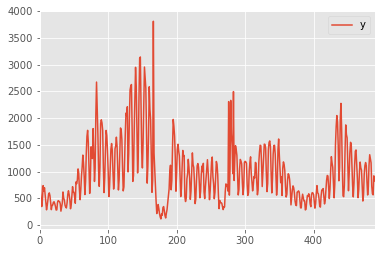

In [51]:
traindf.plot()

In [52]:
traindf.loc[traindf.y > traindf.y.quantile(.95), ['y']] = None

/Users/dbcerigo/miniconda3/envs/basePy3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


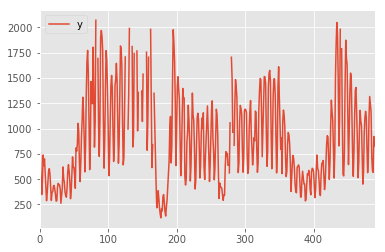

In [53]:
traindf.plot()

In [54]:
m = Prophet(yearly_seasonality=True)
m.fit(traindf)

In [55]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [56]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,204.119975,-45.033532,442.111263
546,2016-12-28,229.579435,-1.109773,469.670128
547,2016-12-29,177.391048,-70.868306,418.323237
548,2016-12-30,-84.867469,-336.205378,171.418023
549,2016-12-31,-329.989184,-570.844379,-90.546662


In [60]:
testdf.tail()

,ds,y
545,2016-12-27,240.0
546,2016-12-28,214.0
547,2016-12-29,229.0
548,2016-12-30,173.0
549,2016-12-31,181.0


In [61]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
ds    550 non-null datetime64[ns]
y     525 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [62]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 17 columns):
ds                550 non-null datetime64[ns]
t                 550 non-null float64
trend             550 non-null float64
seasonal_lower    550 non-null float64
seasonal_upper    550 non-null float64
trend_lower       550 non-null float64
trend_upper       550 non-null float64
yhat_lower        550 non-null float64
yhat_upper        550 non-null float64
weekly            550 non-null float64
weekly_lower      550 non-null float64
weekly_upper      550 non-null float64
yearly            550 non-null float64
yearly_lower      550 non-null float64
yearly_upper      550 non-null float64
seasonal          550 non-null float64
yhat              550 non-null float64
dtypes: datetime64[ns](1), float64(16)
memory usage: 73.1 KB


In [65]:
forecast.merge(testdf, on='ds', how='inner')

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat,y
0,2015-07-01,0.000000,908.611364,10.280271,10.280271,908.611364,908.611364,697.385617,1151.895857,253.702357,253.702357,253.702357,-243.422086,-243.422086,-243.422086,10.280271,918.891634,856.0
1,2015-07-02,0.002045,909.001454,-86.710672,-86.710672,909.001454,909.001454,575.076132,1075.835550,176.906463,176.906463,176.906463,-263.617135,-263.617135,-263.617135,-86.710672,822.290782,752.0
2,2015-07-03,0.004090,909.391544,-401.462217,-401.462217,909.391544,909.391544,254.344273,753.301311,-118.200453,-118.200453,-118.200453,-283.261763,-283.261763,-283.261763,-401.462217,507.929328,498.0
3,2015-07-04,0.006135,909.781635,-705.996700,-705.996700,909.781635,909.781635,-52.688712,443.255577,-403.700975,-403.700975,-403.700975,-302.295724,-302.295724,-302.295724,-705.996700,203.784935,348.0
4,2015-07-05,0.008180,910.171725,-581.045187,-581.045187,910.171725,910.171725,84.988911,569.870101,-260.384655,-260.384655,-260.384655,-320.660532,-320.660532,-320.660532,-581.045187,329.126538,475.0
5,2015-07-06,0.010225,910.561815,-230.658960,-230.658960,910.561815,910.561815,458.977972,917.688122,107.640932,107.640932,107.640932,-338.299892,-338.299892,-338.299892,-230.658960,679.902856,739.0
6,2015-07-07,0.012270,910.951906,-111.123869,-111.123869,910.951906,910.951906,537.045210,1039.085603,244.036332,244.036332,244.036332,-355.160202,-355.160202,-355.160202,-111.123869,799.828036,633.0
7,2015-07-08,0.014315,911.341996,-117.488769,-117.488769,911.341996,911.341996,536.337741,1034.305127,253.702357,253.702357,253.702357,-371.191126,-371.191126,-371.191126,-117.488769,793.853228,700.0
8,2015-07-09,0.016360,911.732087,-209.439747,-209.439747,911.732087,911.732087,430.739317,940.893006,176.906463,176.906463,176.906463,-386.346210,-386.346210,-386.346210,-209.439747,702.292339,567.0
9,2015-07-10,0.018405,912.122177,-518.783985,-518.783985,912.122177,912.122177,148.747713,620.838672,-118.200453,-118.200453,-118.200453,-400.583531,-400.583531,-400.583531,-518.783985,393.338192,425.0


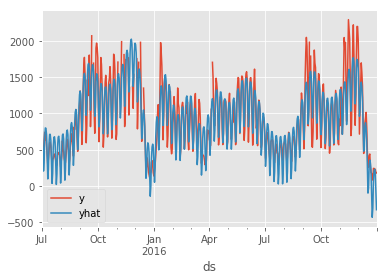

In [69]:
forecast.merge(testdf, on='ds', how='inner').set_index('ds').loc[:,['y','yhat']].plot()

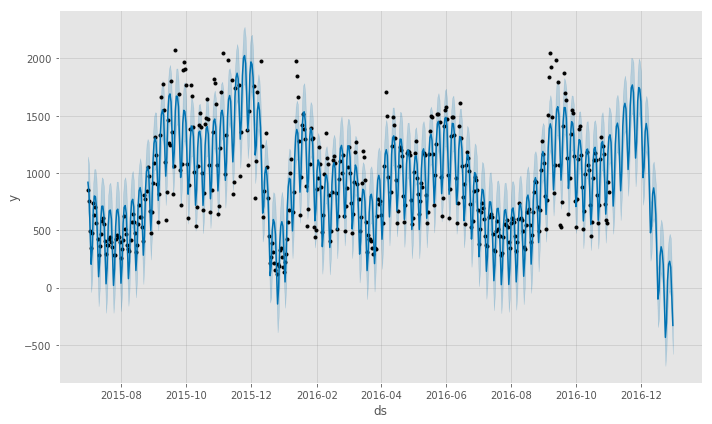

In [34]:
m.plot(forecast);

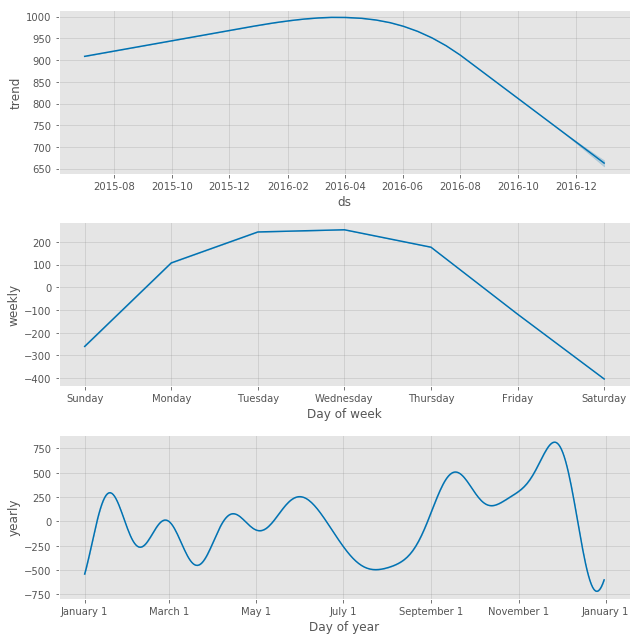

In [35]:
m.plot_components(forecast);

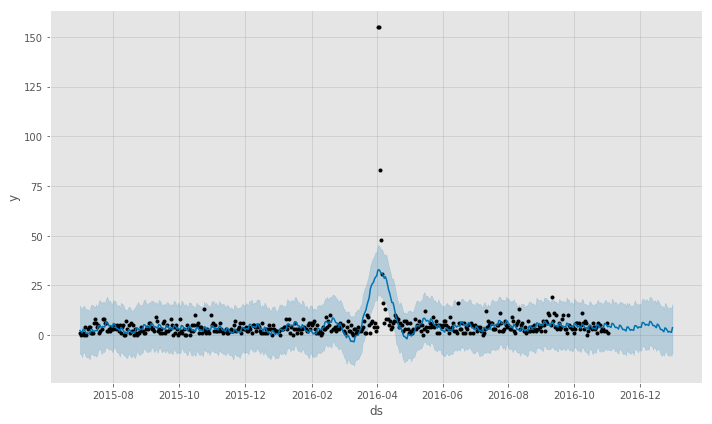

In [33]:
m.plot(forecast);

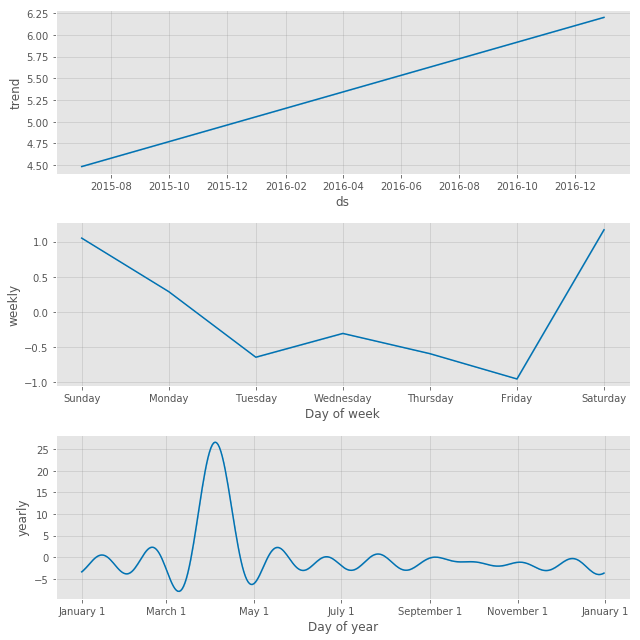

In [34]:
m.plot_components(forecast);

In [48]:
tdf = m.make_future_dataframe(periods=60); tdf.tail()

,ds
545,2016-12-27
546,2016-12-28
547,2016-12-29
548,2016-12-30
549,2016-12-31


In [58]:
forecast = m.predict(tdf)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
545,2016-12-27,24.259742,-14.126731,60.034906
546,2016-12-28,21.553965,-16.345840,59.748443
547,2016-12-29,19.931619,-17.031653,56.470195
548,2016-12-30,18.423816,-17.542284,54.622527
549,2016-12-31,23.231932,-12.298857,60.830194


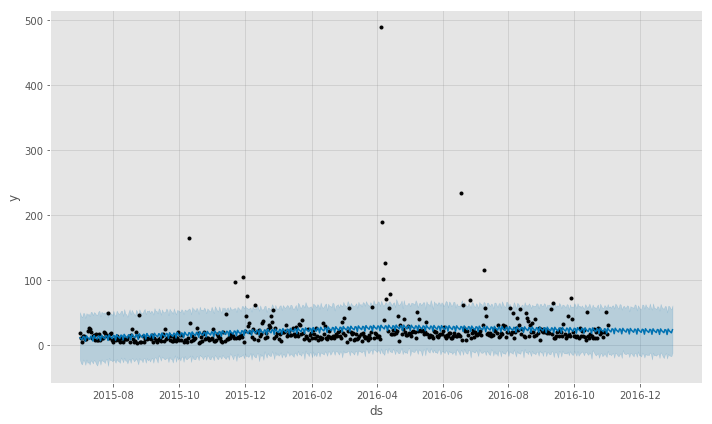

In [59]:
m.plot(forecast);

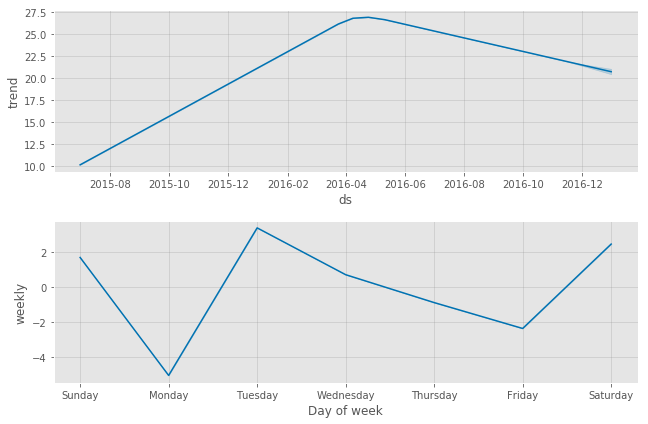

In [60]:
m.plot_components(forecast);